In [133]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import warnings

# EDA on Iris Dataset

## Dataset Overview

In [181]:
df = pd.read_csv("penguins.csv") 

# Printing top 5 rows 
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [183]:
#make the Id column as index
df = pd.read_csv('penguins.csv')
df.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female


In [184]:
grouped = df.groupby('species')
# Calculate the median for numeric columns
numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']
medians = grouped[numeric_columns].median()

print(medians)


           bill_length_mm  bill_depth_mm  flipper_length_mm
species                                                    
Adelie              38.80          18.40              190.0
Chinstrap           49.55          18.45              196.0
Gentoo              47.30          15.00              216.0


In [185]:
#Statistics of this dataset
stats = df.describe()
stats

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [186]:
#calculate range, and move columns 25%,50%,75%  and mean values into a dataframe
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_df = stats.loc[['mean', 'range', '25%', '50%', '75%']]
new_df.rename({'50%': 'median'}, inplace=True)
new_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
mean,43.92193,17.15117,200.915205,4201.754386
range,27.50000,8.40000,59.000000,3600.000000
25%,39.22500,15.60000,190.000000,3550.000000
median,44.45000,17.30000,197.000000,4050.000000
75%,48.50000,18.70000,213.000000,4750.000000


In [187]:
df.shape

(344, 7)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


### Checking Missing Values

In [189]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [190]:
# Remove rows with missing data
df.dropna(inplace = True)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Checking Duplicates

In [191]:
#Checking Duplicates
data = df.drop_duplicates(subset ="species") 
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
152,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female
276,Chinstrap,Dream,46.5,17.9,192.0,3500.0,female


In [192]:
df.value_counts("species")

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

## Aggregation functions

In [193]:
#Calculate mean and median or others using multiple functions at once - 2 methods

numeric_columns = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm','body_mass_g']

# Group by the 'species' column and calculate mean and median
result = df.groupby('species')[numeric_columns].agg(['mean', 'median'])

print(result)

          bill_length_mm        bill_depth_mm        flipper_length_mm         \
                    mean median          mean median              mean median   
species                                                                         
Adelie         38.823973  38.85     18.347260  18.40        190.102740  190.0   
Chinstrap      48.833824  49.55     18.420588  18.45        195.823529  196.0   
Gentoo         47.568067  47.40     14.996639  15.00        217.235294  216.0   

           body_mass_g          
                  mean  median  
species                         
Adelie     3706.164384  3700.0  
Chinstrap  3733.088235  3700.0  
Gentoo     5092.436975  5050.0  


## Data Visualization

### Distribution Plot

C:\Users\Ruman\AppData\Local\Temp\ipykernel_58300\245892441.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['flipper_length_mm'], bins=40, color='m')
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of flipper-length')

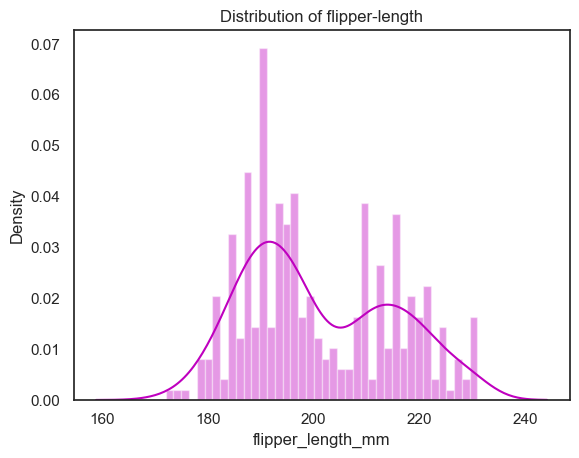

In [194]:
sns.distplot(a=df['flipper_length_mm'], bins=40, color='m')
plt.title('Distribution of flipper-length')

## Count Plot

<Axes: xlabel='species', ylabel='count'>

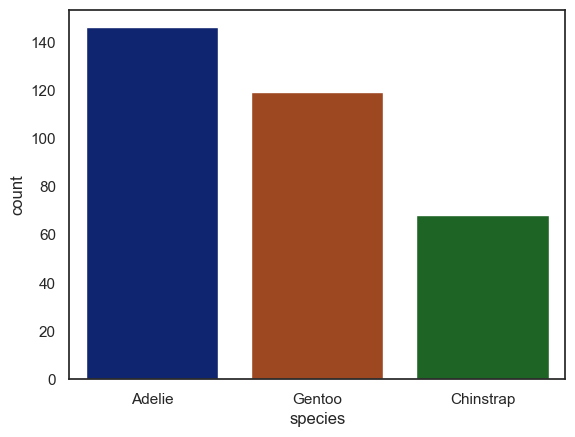

In [195]:
sns.countplot(x='species',data=df)

### Box Plot

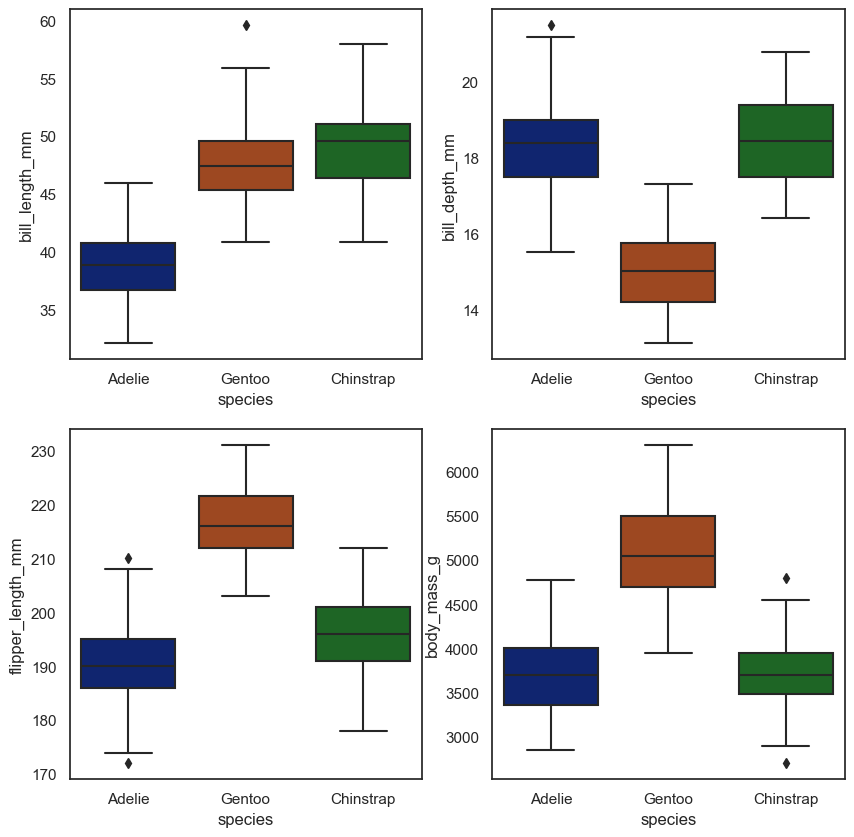

In [196]:
def graph(y): 
    sns.boxplot(x="species", y=y, data=df) 
  
plt.figure(figsize=(10,10)) 
      
# Adding the subplot at the specified 
# grid position 
plt.subplot(221) 
graph('bill_length_mm') 
  
plt.subplot(222) 
graph('bill_depth_mm') 
  
plt.subplot(223) 
graph('flipper_length_mm') 
  
plt.subplot(224) 
graph('body_mass_g') 
  
plt.show()

### Violin Plot

<Axes: xlabel='species', ylabel='bill_length_mm'>

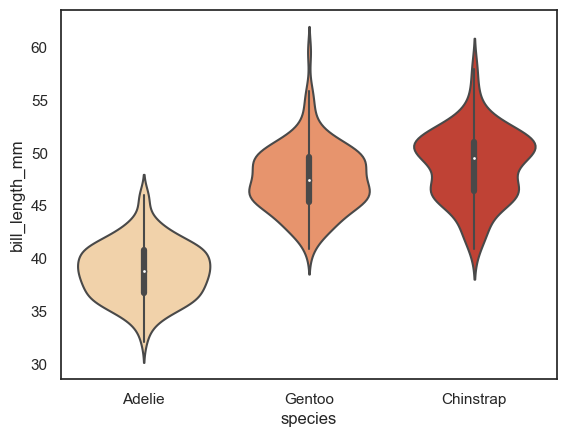

In [197]:
sns.violinplot(x='species', y='bill_length_mm', data=df, palette='OrRd')

### Heatmap

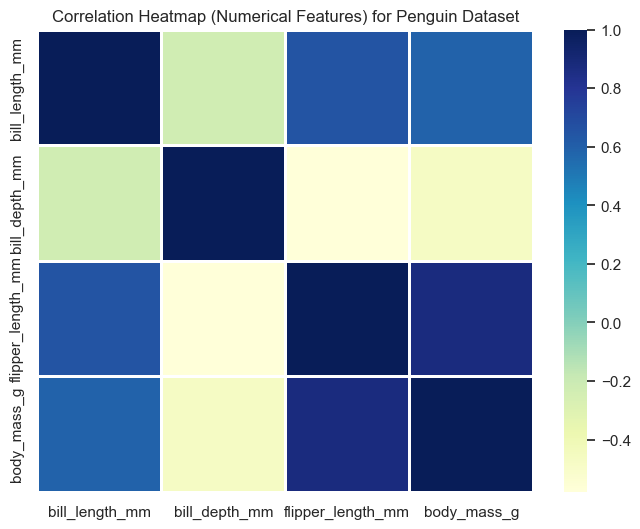

In [198]:
# Encode species names into numerical labels
species_mapping = {'Adelie': 0, 'Gentoo': 1, 'Chinstrap': 2}
df['species'] = df['species'].map(species_mapping)

# Compute the correlation matrix for numerical features only
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
corr_matrix = df[numerical_features].corr()

# Create the heatmap without species row and column
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, cmap="YlGnBu", linecolor='white', linewidths=1)
plt.title("Correlation Heatmap (Numerical Features) for Penguin Dataset")
plt.show()

### Regression Plot

<Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>

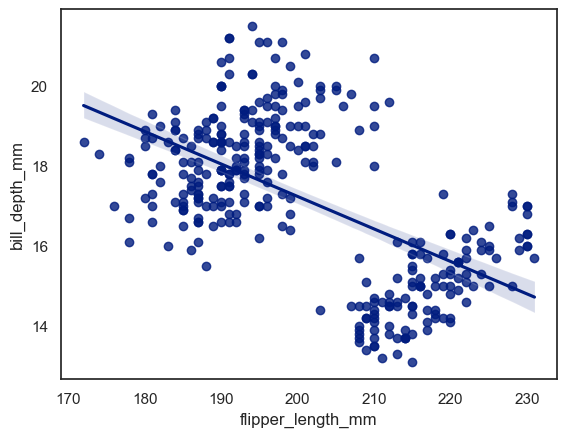

In [199]:
sns.regplot(x='flipper_length_mm', y='bill_depth_mm', data=df)

### LM Plot

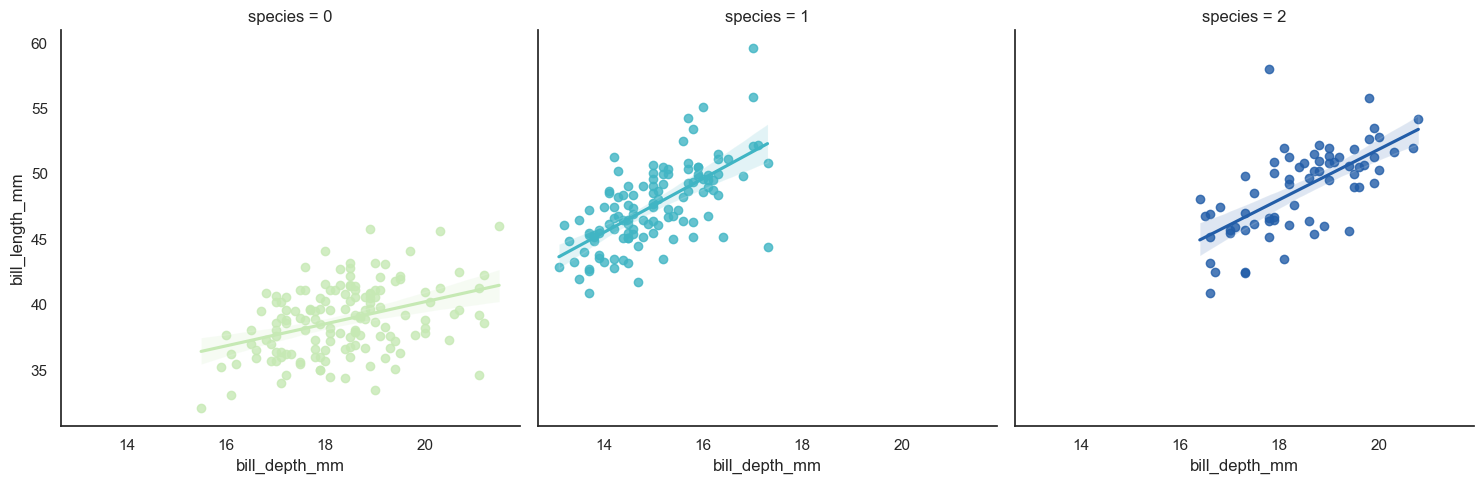

In [200]:
sns.lmplot(x = 'bill_depth_mm', y = 'bill_length_mm', data = df, col = 'species', hue = 'species', palette = 'YlGnBu')

### Joint Plot

C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

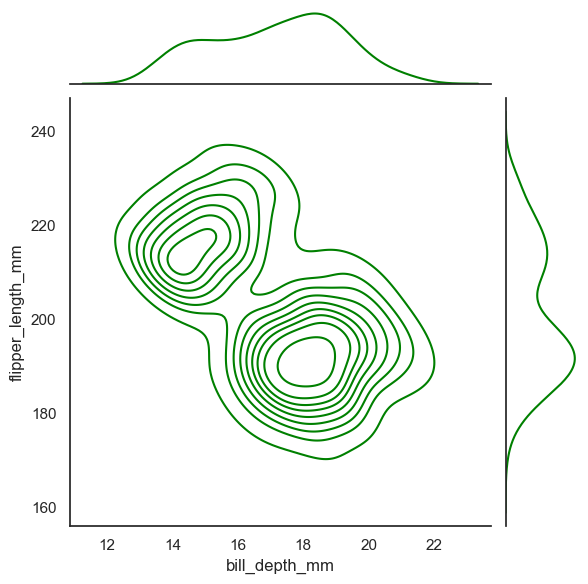

In [201]:
sns.jointplot(x="bill_depth_mm", y="flipper_length_mm", data=df, kind="kde", color="g")

Body Mass Distribution


C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

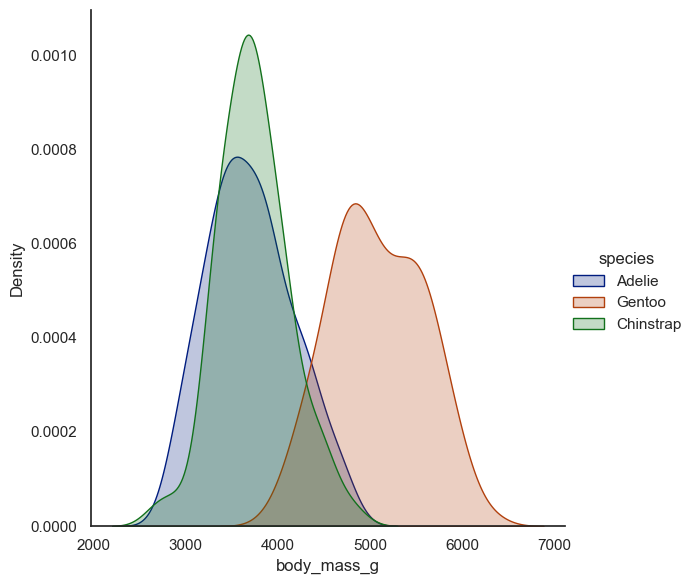

In [203]:
df = pd.read_csv('penguins.csv')
print('Body Mass Distribution')
sns.FacetGrid(df, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",shade=True).add_legend()
plt.show()


### Scatter Plot

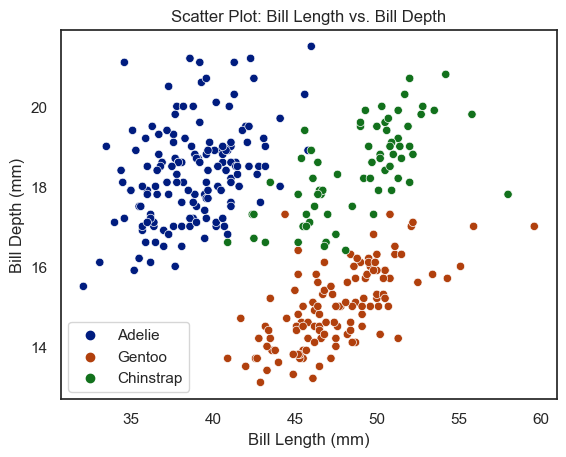

In [204]:
df = pd.read_csv('penguins.csv')
df.dropna(inplace = True)

sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.title('Scatter Plot: Bill Length vs. Bill Depth')
plt.legend()
plt.show()


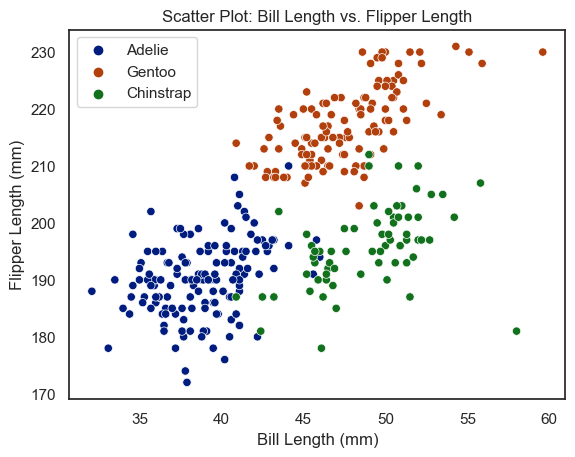

In [205]:
sns.scatterplot(data=df, x='bill_length_mm', y='flipper_length_mm', hue='species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Scatter Plot: Bill Length vs. Flipper Length')
plt.legend()
plt.show()


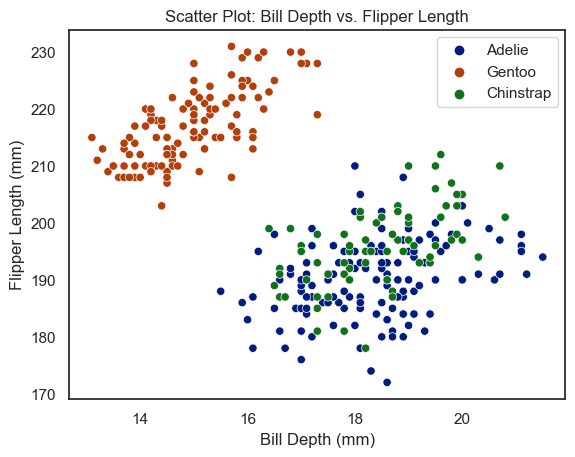

In [158]:
sns.scatterplot(data=df, x='bill_depth_mm', y='flipper_length_mm', hue='species')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Scatter Plot: Bill Depth vs. Flipper Length')
plt.legend()
plt.show()


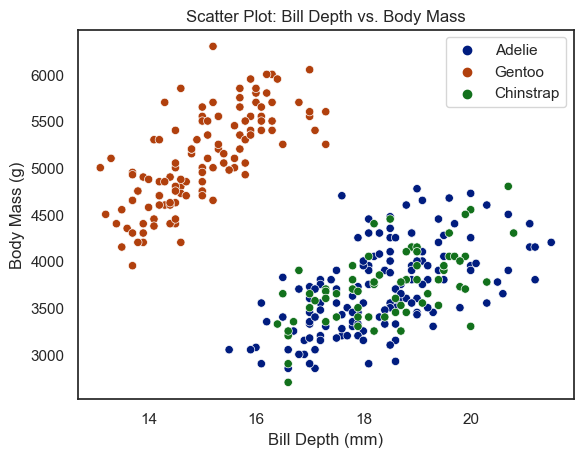

In [206]:
sns.scatterplot(data=df, x='bill_depth_mm', y='body_mass_g', hue='species')
plt.xlabel('Bill Depth (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot: Bill Depth vs. Body Mass')
plt.legend()
plt.show()


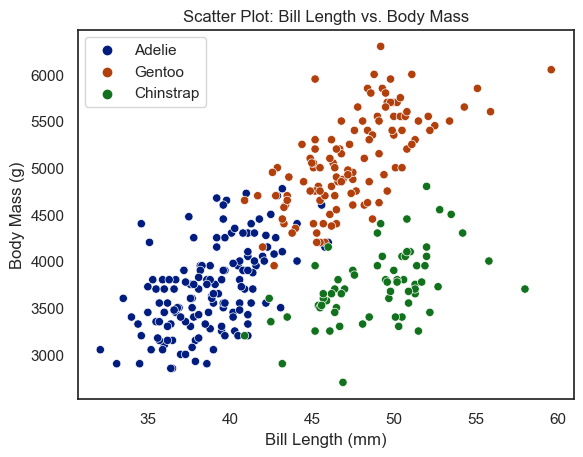

In [207]:
sns.scatterplot(data=df, x='bill_length_mm', y='body_mass_g', hue='species')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot: Bill Length vs. Body Mass')
plt.legend()
plt.show()


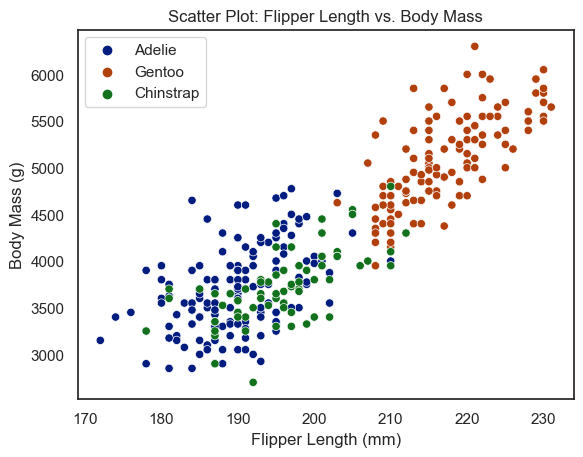

In [208]:
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.title('Scatter Plot: Flipper Length vs. Body Mass')
plt.legend()
plt.show()


### Pair Plot

Pairplot


C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

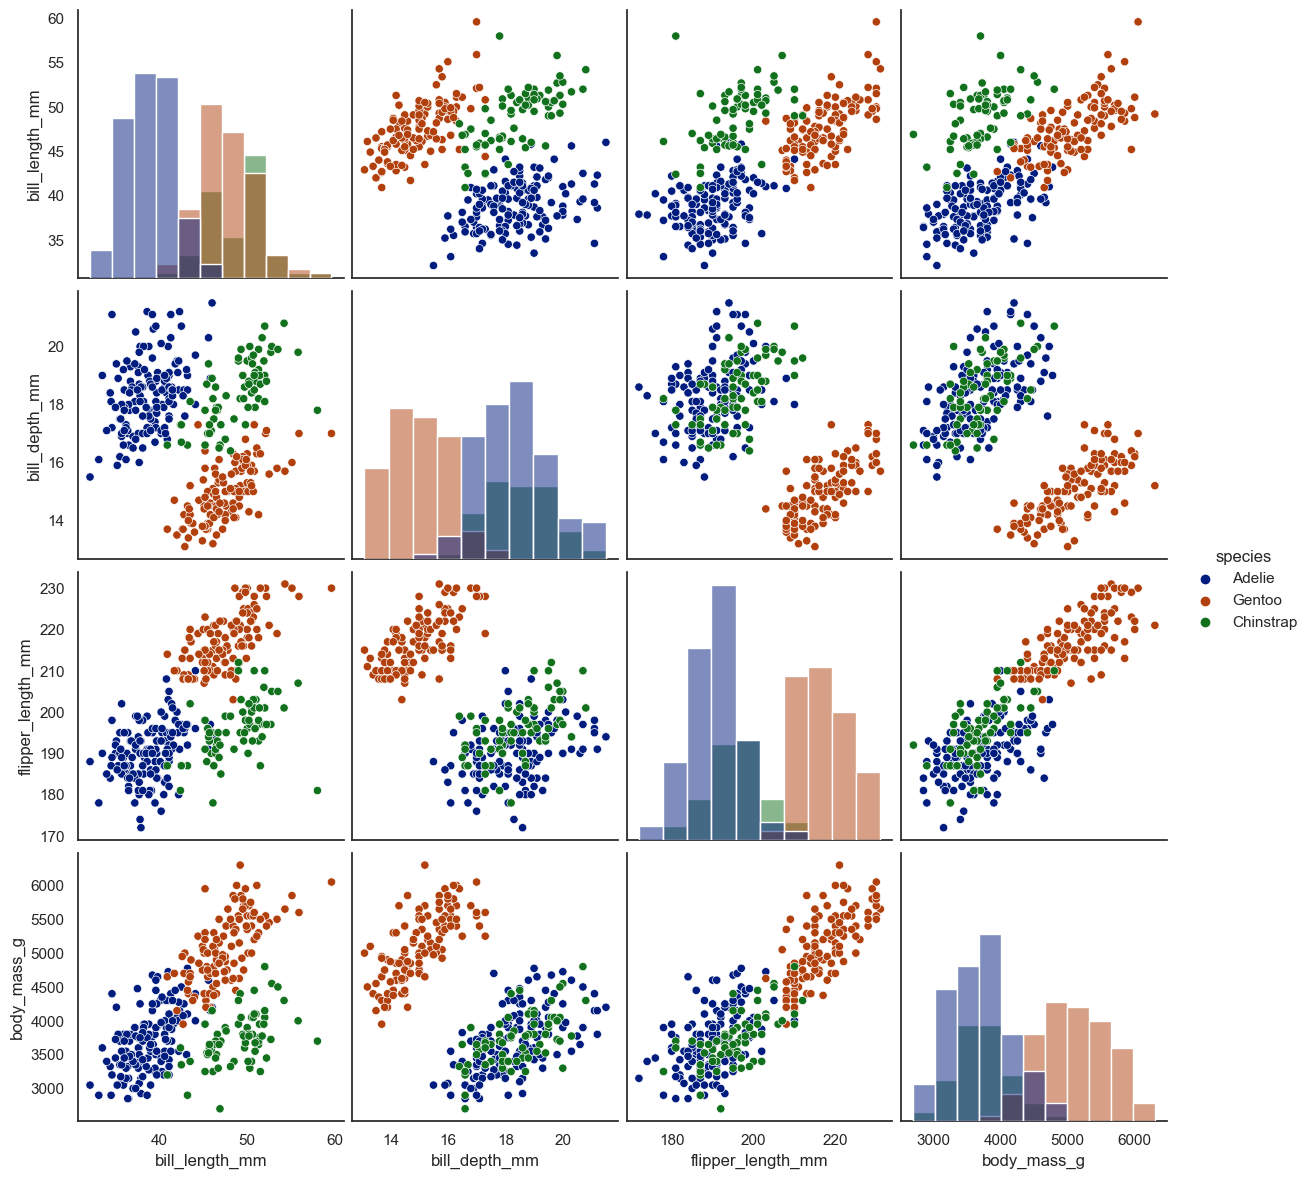

In [209]:
print('Pairplot')
sns.pairplot(data=df[['species','bill_length_mm','bill_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()


### Histogram

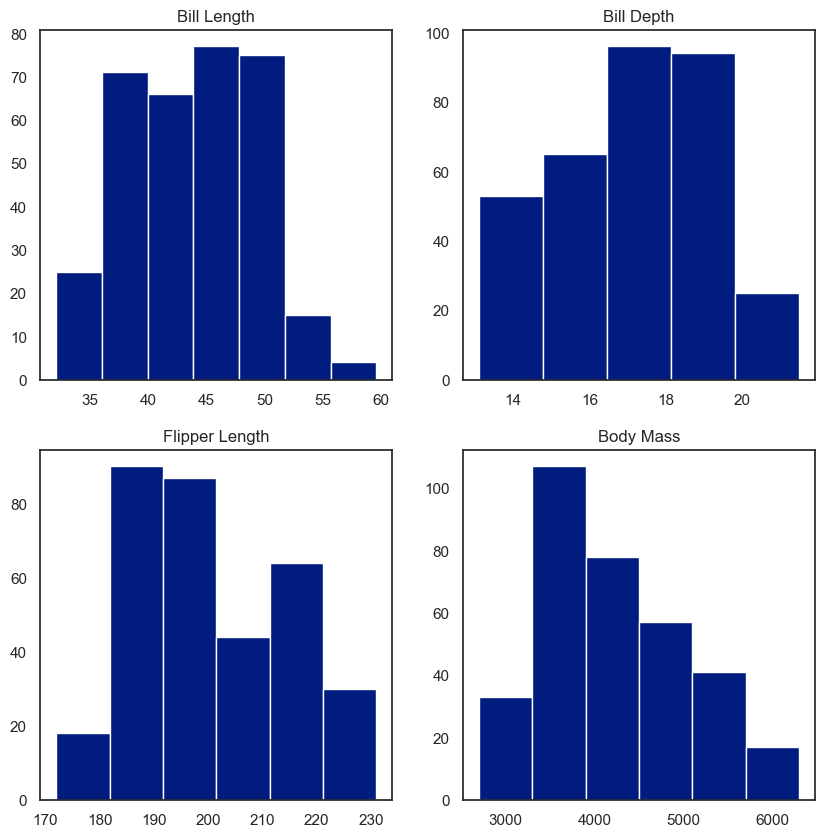

In [210]:
fig, axes = plt.subplots(2, 2, figsize=(10,10)) 
  
axes[0,0].set_title("Bill Length") 
axes[0,0].hist(df['bill_length_mm'], bins=7) 
  
axes[0,1].set_title("Bill Depth") 
axes[0,1].hist(df['bill_depth_mm'], bins=5); 
  
axes[1,0].set_title("Flipper Length") 
axes[1,0].hist(df['flipper_length_mm'], bins=6); 
  
axes[1,1].set_title("Body Mass") 
axes[1,1].hist(df['body_mass_g'], bins=6);

### Histograms with Distplot Plot

C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Ruman\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

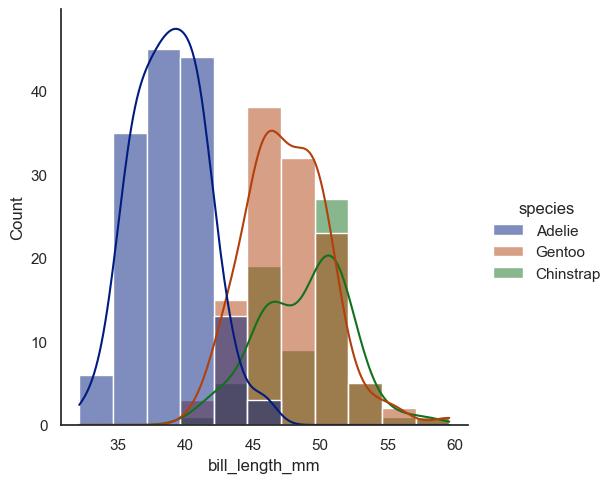

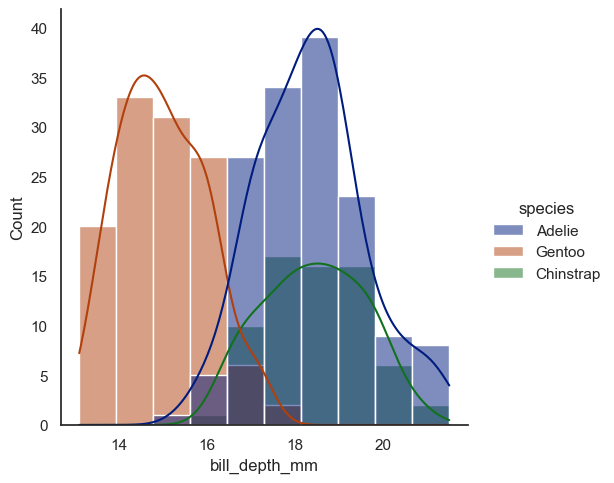

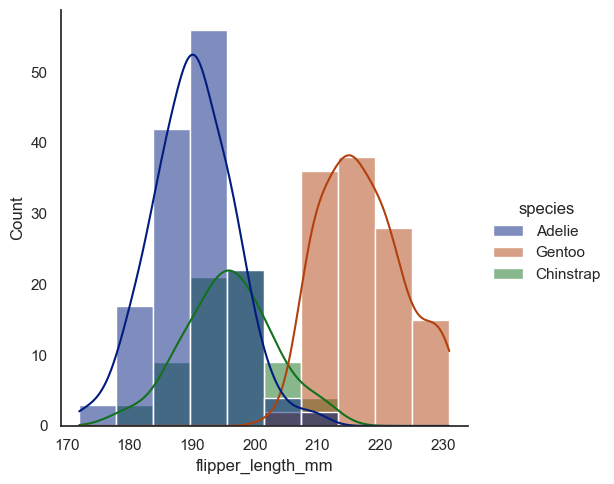

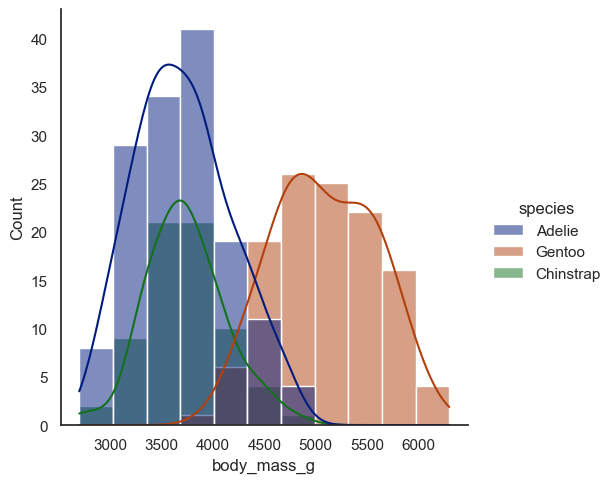

In [162]:
df = pd.read_csv('penguins.csv') 
df.dropna(inplace = True)

sns.displot(data=df, x="bill_length_mm", hue="species", kde=True)
sns.displot(data=df, x="bill_depth_mm", hue="species", kde=True)
sns.displot(data=df, x="flipper_length_mm", hue="species", kde=True)
sns.displot(data=df, x="body_mass_g", hue="species", kde=True)

plt.show()

### Handling Correlation

In [163]:
df = pd.read_csv('Penguins.csv') 
df.dropna(inplace = True)

numeric_columns = df.select_dtypes(include=['float64'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr(method='pearson')

print(correlation_matrix)

                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


### Handling Outliers

<Axes: xlabel='bill_length_mm'>

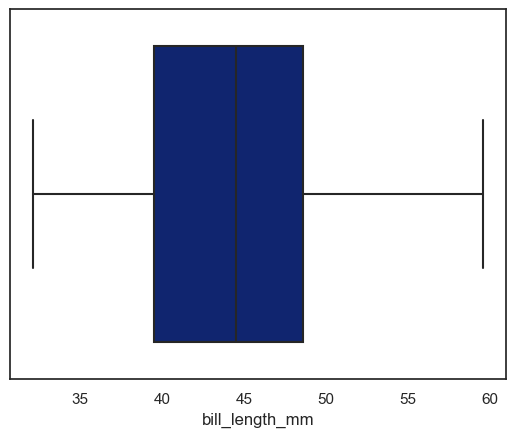

In [168]:
df = pd.read_csv('Penguins.csv') 
df.dropna(inplace = True)

sns.boxplot(x='bill_length_mm', data=df)

# Train-Test Analysis

In [169]:
data = df.copy()
data.dropna(inplace = True)

data.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [170]:
from sklearn.model_selection import train_test_split

target = 'species'
X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)
# it shows 80% of data is split for training and 20% of the data goes to testing.
print(X_train.shape)
print(X_test.shape)

(266, 4)
(67, 4)


# Supervised Analysis

## Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Test Accuracy for Scikit-Learn model:', metrics.accuracy_score(y_test, y_pred)* 100,'%')

Test Accuracy for Scikit-Learn model: 98.50746268656717 %


## Random Forest

In [172]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('Test Accuracy for Random Forest:', metrics.accuracy_score(y_test, y_pred_rf) * 100, '%')

Test Accuracy for Random Forest: 95.52238805970148 %


## Decision Tree

In [173]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('Test Accuracy for Decision Tree:', metrics.accuracy_score(y_test, y_pred_dt) * 100, '%')

Test Accuracy for Decision Tree: 95.52238805970148 %


## Support Vector Machines (SVM):

In [174]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('Test Accuracy for SVM:', metrics.accuracy_score(y_test, y_pred_svm) * 100, '%')

Test Accuracy for SVM: 76.11940298507463 %


## Unsupervised analysis

## K-means clustering

In [176]:
data = df.copy()
data.dropna(inplace = True)

CLUSTERING ON BILL LENGTH AND BILL DEPTH


C:\Users\Ruman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ruman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


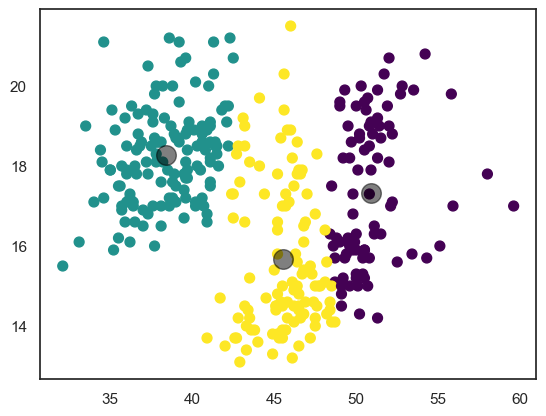

In [177]:
from sklearn.cluster import KMeans

print('CLUSTERING ON BILL LENGTH AND BILL DEPTH')
X = data[['bill_length_mm','bill_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'bill_length_mm'], X.loc[:, 'bill_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


CLUSTERING ON FLIPPER LENGTH AND BILL DEPTH


C:\Users\Ruman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ruman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


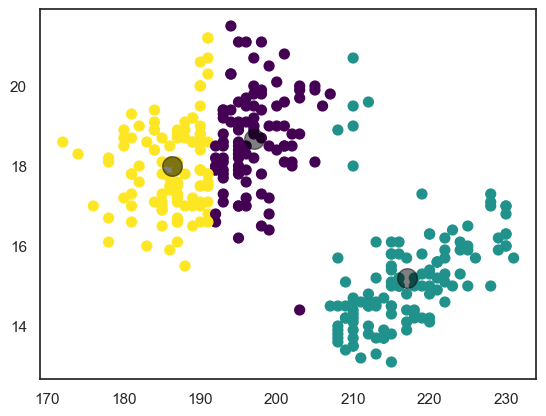

In [178]:
print('CLUSTERING ON FLIPPER LENGTH AND BILL DEPTH')
X = data[['flipper_length_mm','bill_depth_mm']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'bill_depth_mm'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


CLUSTERING ON FLIPPER LENGTH AND BODY MASS


C:\Users\Ruman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Ruman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


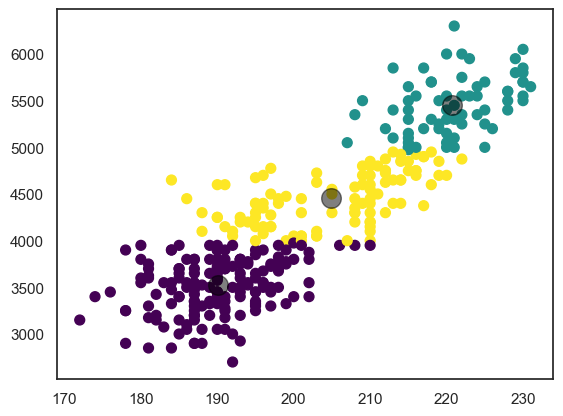

In [179]:
print('CLUSTERING ON FLIPPER LENGTH AND BODY MASS')
X = data[['flipper_length_mm','body_mass_g']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X.loc[:, 'flipper_length_mm'], X.loc[:, 'body_mass_g'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()


## KNN (k-nearest neighbors) 

In [180]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print('Test Accuracy for KNN:', metrics.accuracy_score(y_test, y_pred_knn) * 100, '%')

Test Accuracy for KNN: 82.08955223880598 %
